In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
# define number of points
n_samples = 100
mu1, sigma1 = -4, 1.2 # mean and variance
mu2, sigma2 = 4, 1.8 # mean and variance
mu3, sigma3 = 0, 1.6 # mean and variance

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)

print("Dataset shape:", X.shape)

Dataset shape: (300,)


In [3]:
def pdf(data, mean: float, variance: float):
    # a normal random continuous variable\
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data - mean)/(2*variance)))
    return s1 * s2

[]

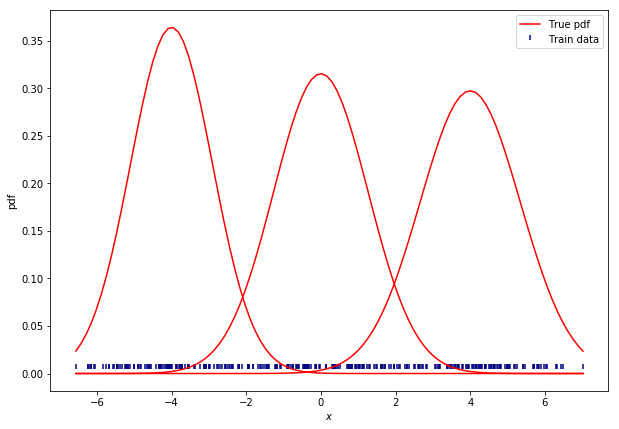

In [4]:
# visualize the training data
bins = np.linspace(np.min(X), np.max(X), 100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='red')
plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

In [5]:
# define the number of clusters to be learned

k = 3
weights = np.ones((k))/k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[ 1.28564223  1.60976681 -4.10026992] [0.98435287 0.63802996 0.81146391]


In [6]:
X = np.array(X)
print(X.shape)

(300,)


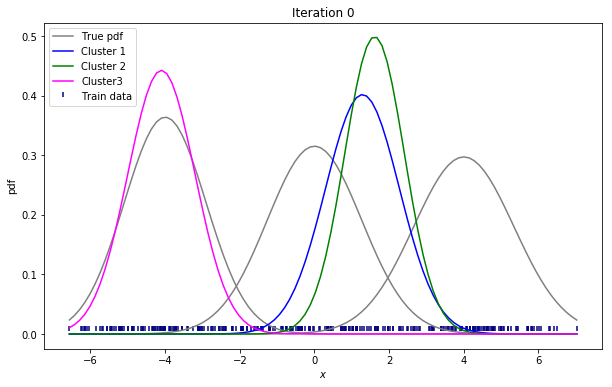

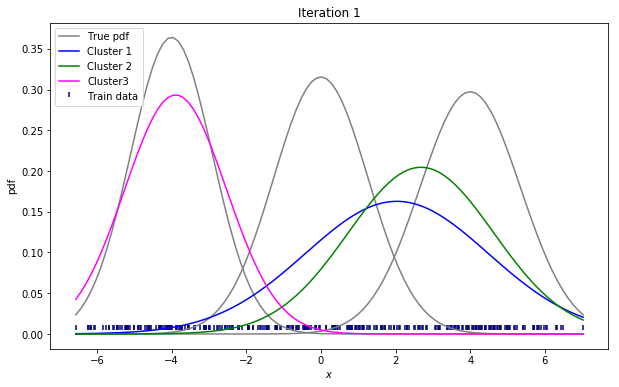

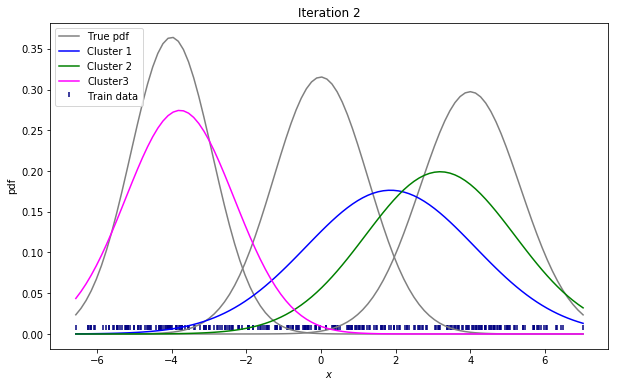

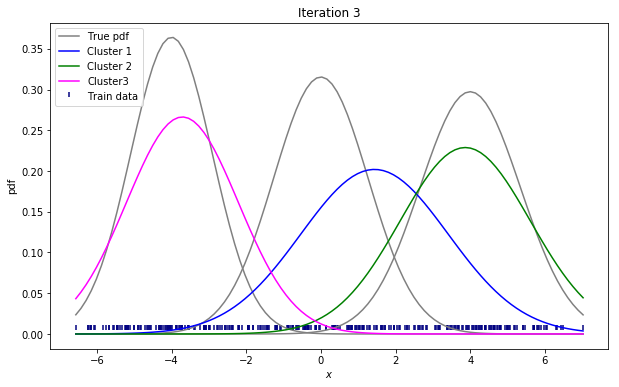

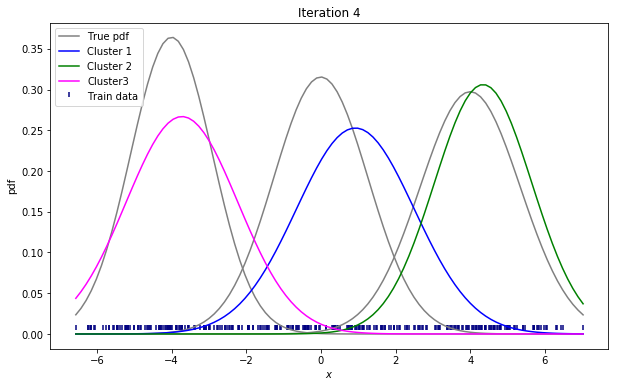

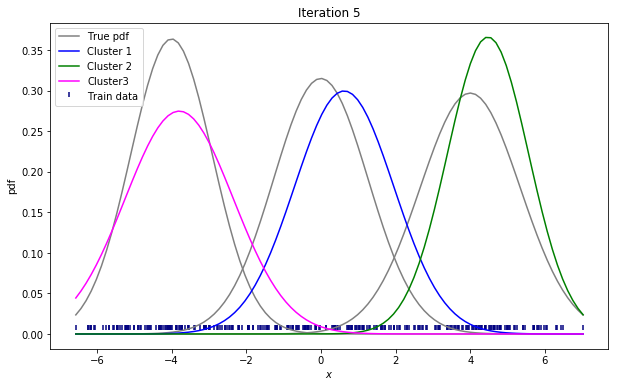

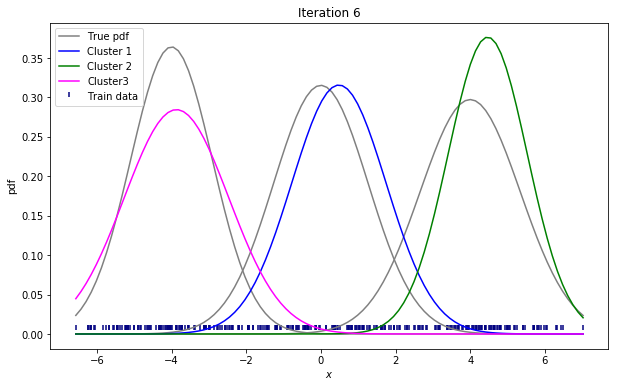

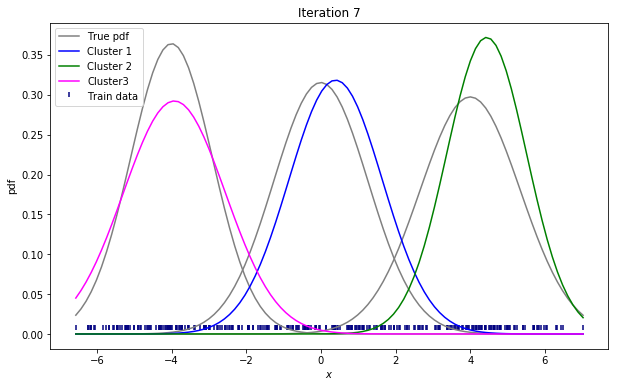

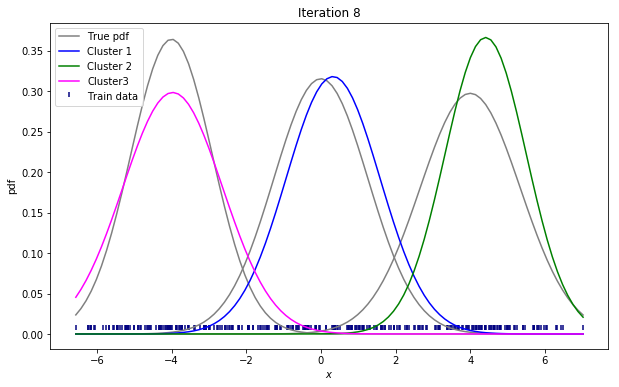

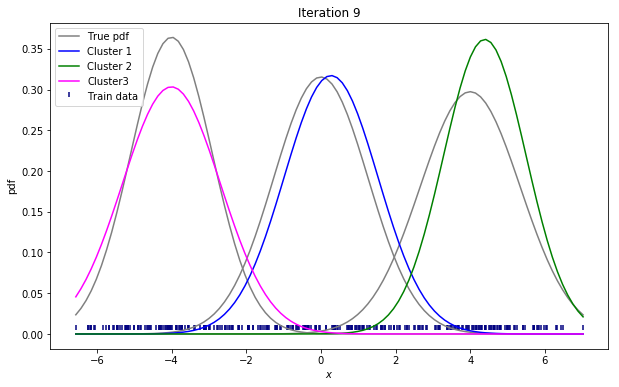

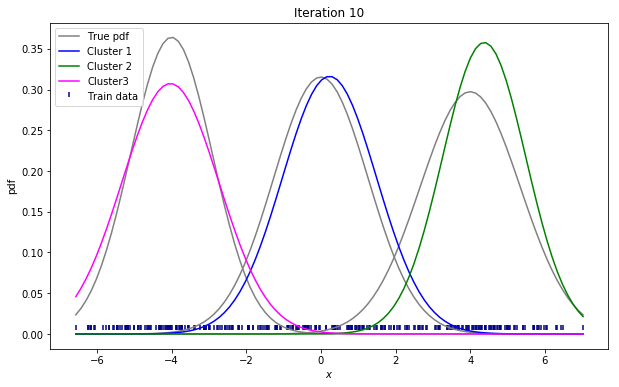

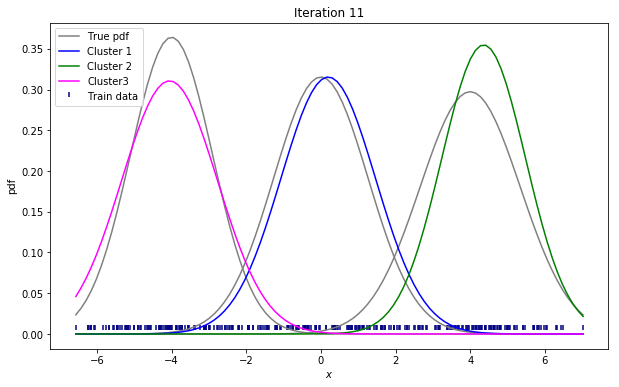

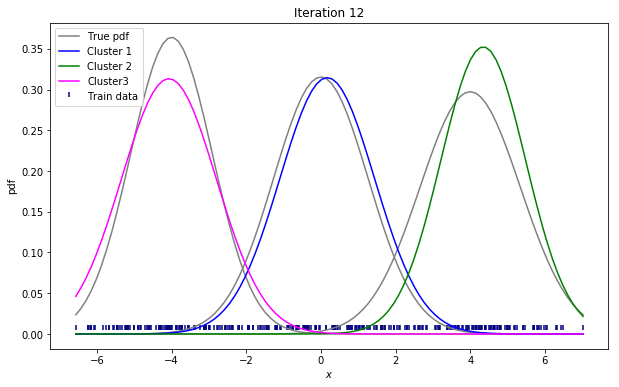

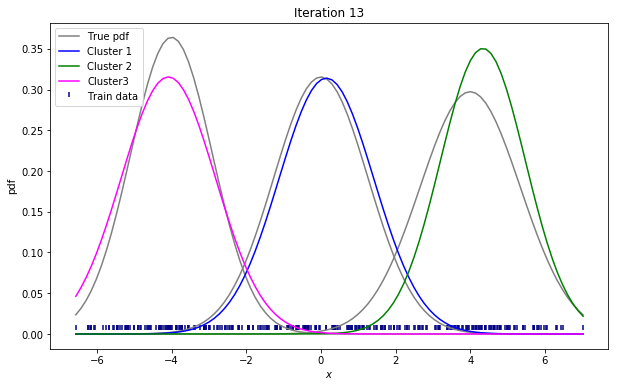

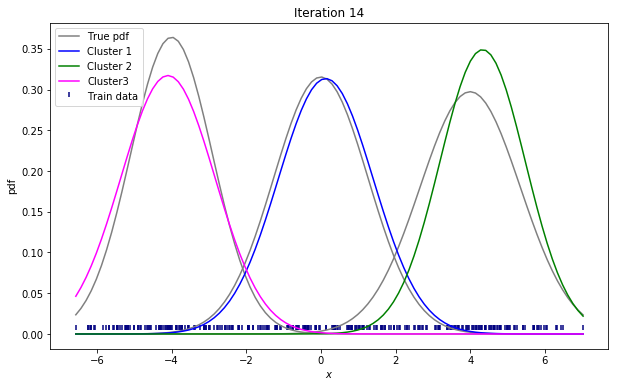

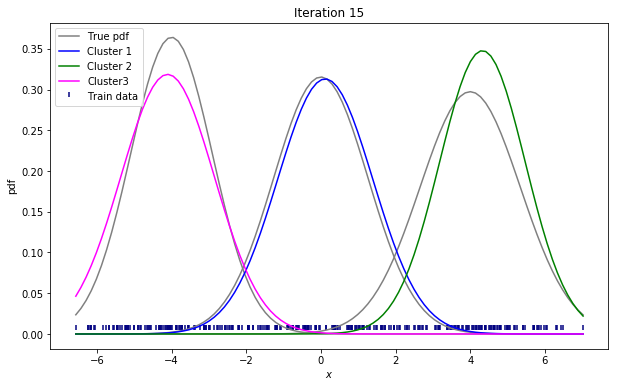

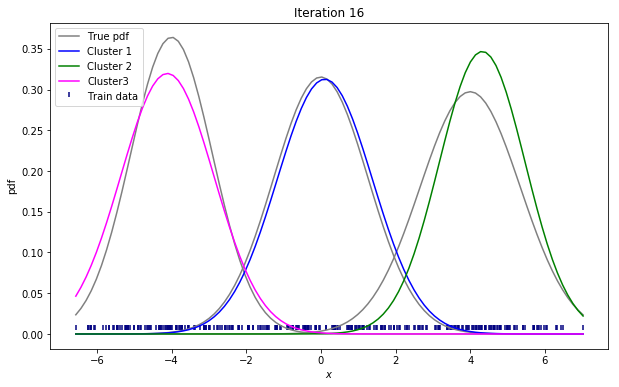

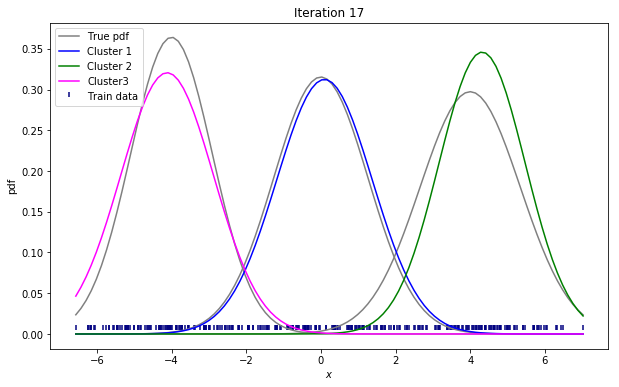

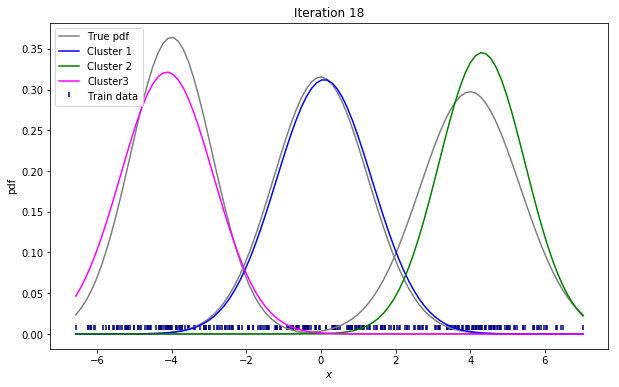

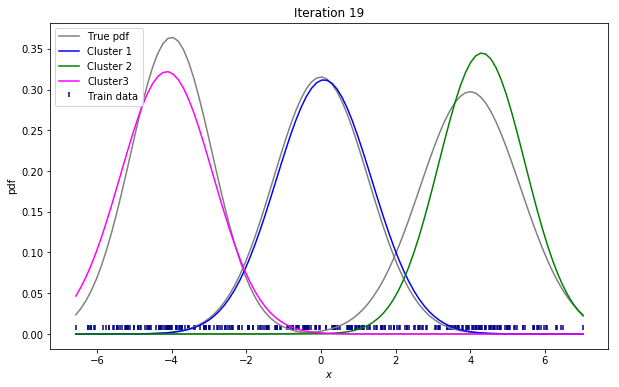

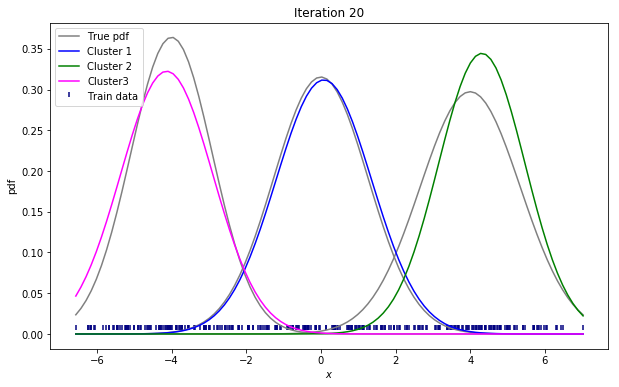

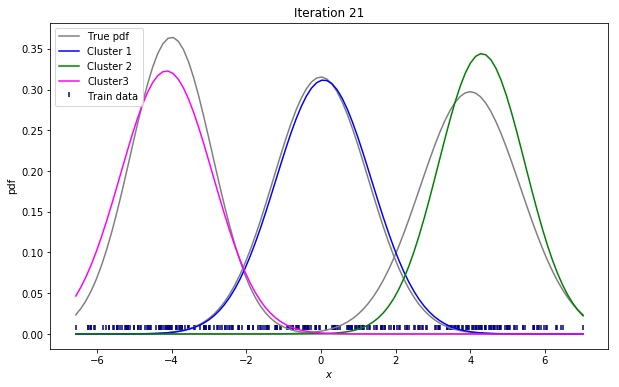

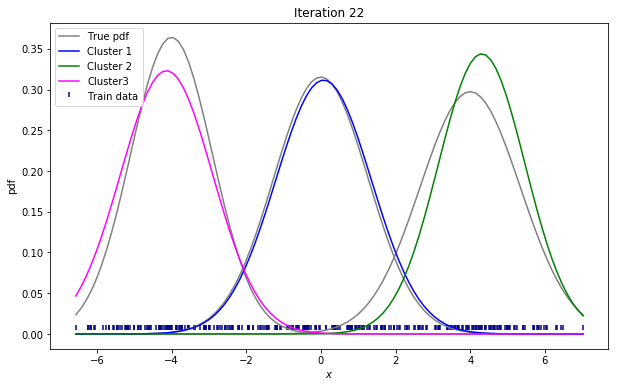

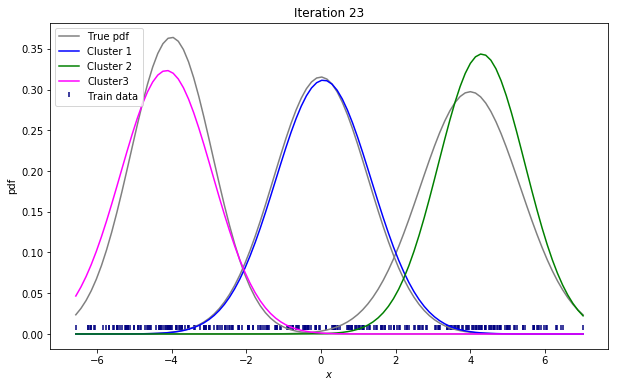

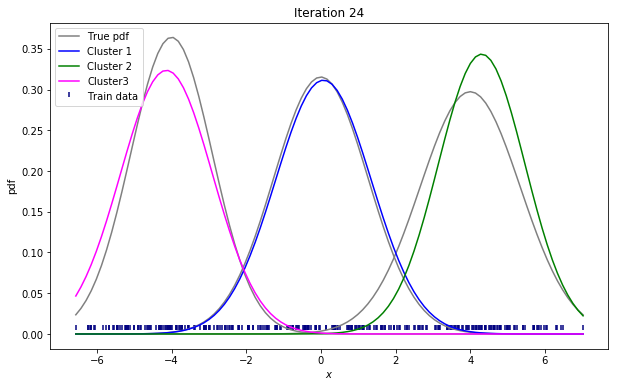

In [7]:
eps = 1e-8

for step in range(25):
    
    if step % 1 == 0:
        
        plt.figure(figsize=(10, 6))
        axes = plt.gca()
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(step))
        plt.scatter(X, [0.005] * len(X), color='navy', s = 30, marker = 2, label = "Train data")
        
        plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label='True pdf')
        plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
        plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')
        
        plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label='Cluster 1')
        plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label='Cluster 2')
        plt.plot(bins, pdf(bins, means[2], variances[2]), color='magenta', label='Cluster3')
        
        plt.legend(loc='upper left')
        
        plt.savefig('gmm_files\img_{0:02d}'.format(step), bbox_inches='tight')
        plt.show()
    
    # calculate the maximum likelihood of each observation xi
    likelihood = []
    
    
    #Expectation step
    for j in range(k):
        likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
    likelihood = np.array(likelihood)
    
    b = []
    #Maximization step
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generated by each gaussian
        b.append((likelihood[j] * weights[j]) / (np.sum([ likelihood[i] * weights[i] for i in range(k)], axis = 0) + eps))
        
        # update mean and variance
        means[j] = np.sum(b[j] * X) / (np.sum(b[j] + eps))
        variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j] + eps))
        
        # update the weights
        weights[j] = np.mean(b[j])

In [45]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams['axes.grid'] = False

In [46]:
# define the number of samples to be drawn
n_samples = 100

In [47]:
# define the mean points for each of the synthetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4 ], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite covariance matrix
t_covs = []
for s in range(len(t_means)):
    t_covs.append(make_spd_matrix(2))

X = []

for mean, cov in zip(t_means, t_covs):
    x = np.random.multivariate_normal(mean, cov, n_samples)
    X += list(x)
    
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (400, 2)


In [48]:
# Create a grid for visualization purposes

x = np.linspace(np.min(X[..., 0])-1, np.max(X[..., 0])+1, 100)
y = np.linspace(np.min(X[..., 1])-1, np.max(X[..., 1])+1, 80)
X_, Y_ = np.meshgrid(x, y)
pos = np.array([X_.flatten(), Y_.flatten()]).T
print(pos.shape)
print(np.max(pos[..., 1]))

(8000, 2)
11.579487410697897


In [49]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight parameters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k, X.shape[1]))
print(means)
print(weights)

[[7.52465629 6.70866471]
 [9.00953655 2.57210023]
 [5.50760875 6.8446596 ]
 [4.35872578 4.44790162]]
[0.25 0.25 0.25 0.25]


In [57]:
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)
print(cov.shape)

(4, 2, 2)


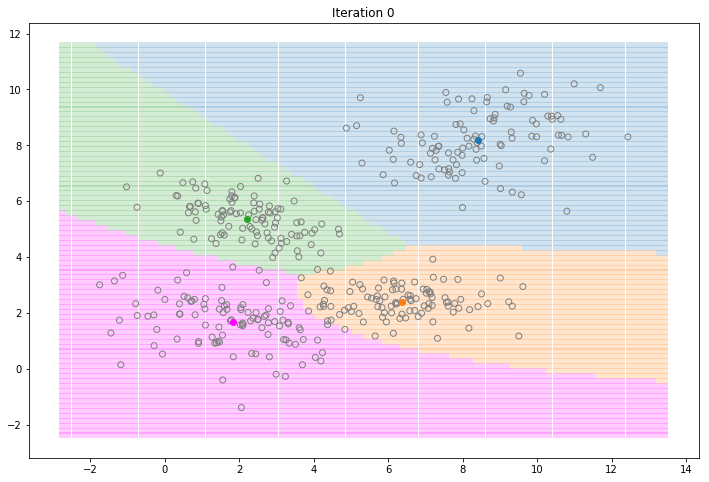

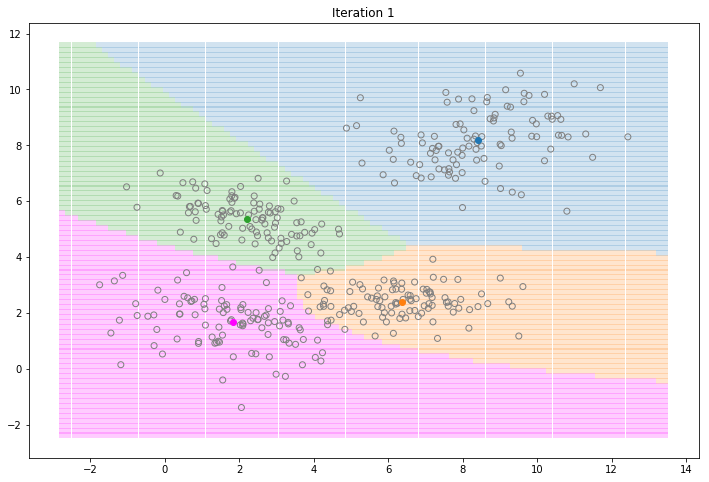

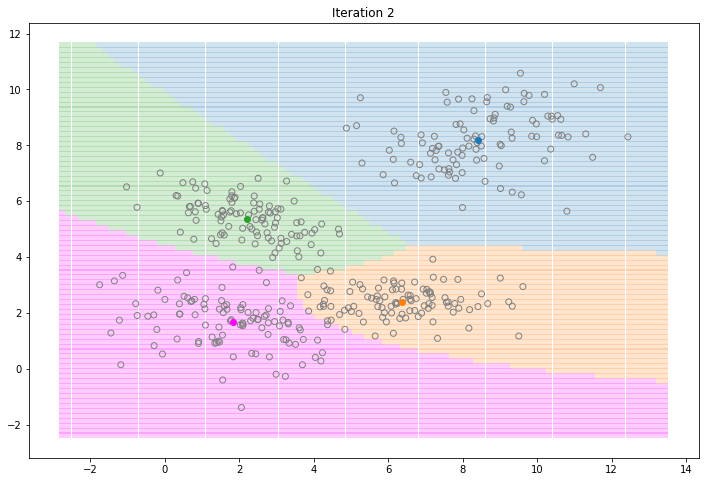

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps = 1e-8

# run GMM for 40 steps
for step in range(40):
    
    #visualize the learned clusters
    if step % 1 == 0:
        plt.figure(figsize=(12, int(8)))
        plt.title("Iteration {}".format(step))
        axes = plt.gca()
        
        likelihood = []
        for j in range(k):
            likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
        likelihood = np.array(likelihood)
        predictions = np.argmax(likelihood, axis=0)
        
        for c in range(k):
            pred_ids = np.where(predictions == c)
            plt.scatter(pos[pred_ids[0], 0], pos[pred_ids[0], 1], color=colors[c], alpha = 0.2, edgecolor='none', marker='s')
            
        plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
        
        for j in range(k):
            plt.scatter(means[j][0], means[j][1], color = colors[j])
        
        #plt.savefig("gmm_files\img_{0.02d}".format(step), bbox_inches='tight')
        plt.show()
        
    likelihood = []
    
    # Expectation step
    
    for j in range(k):
        likelihood.append(multivariate_normal.pdf(x = X, mean = means[j], cov = cov[j]))
    likelihood = np.array(likelihood)
    assert likelihood.shape == (k, len(X))
    
    b = []
    # Maximization step
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generated by each gaussian
        b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis = 0)+eps))
        
        #update mean and variance
        means[j] = np.sum(b[j].reshape(len(X), 1) * X, axis = 0) / (np.sum(b[j]+eps))
        cov[j] = np.dot((b[j].reshape(len(X), 1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)
        
        # update the weights
        weights[j] = np.mean(b[j])
        
        assert cov.shape == (k, X.shape[1], X.shape[1])
        assert means.shape == (k, X.shape[1])